In [5]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")


In [15]:
df1 = pd.read_csv('data/winequality_red.csv')
df1['color']=1 # set red wine to 1
df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [16]:
df2=pd.read_csv('data/winequality_white.csv')
df2['color']=0 # set white wine to 0
df2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


In [19]:
df=pd.concat([df1,df2])

In [20]:
df = df.sample(frac=1).reset_index(drop=True)

In [22]:
ground_truth=df['color']
df=df.drop(['color'],axis=1)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [26]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [27]:
df.isnull().sum()*100/df.isnull().count()

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

In [38]:
from scipy import stats
var_list=list(df.columns.values)
for var in var_list:
    print(stats.shapiro(df[var]))

#test stats and p value, the p values below for each column are very small or equal to 0, 
#so it means all features are normally distributed

(0.8797868490219116, 0.0)
(0.8758624196052551, 0.0)
(0.9649786353111267, 5.271599623843331e-37)
(0.8246825933456421, 0.0)
(0.6183146238327026, 0.0)
(0.9412946105003357, 5.605193857299268e-45)
(0.9825809597969055, 1.5845524098792846e-27)
(0.9681960344314575, 1.3099874349456656e-35)
(0.9914382100105286, 2.1467941222210903e-19)
(0.8989631533622742, 0.0)
(0.9535418152809143, 2.9409050870784936e-41)
(0.884151816368103, 0.0)


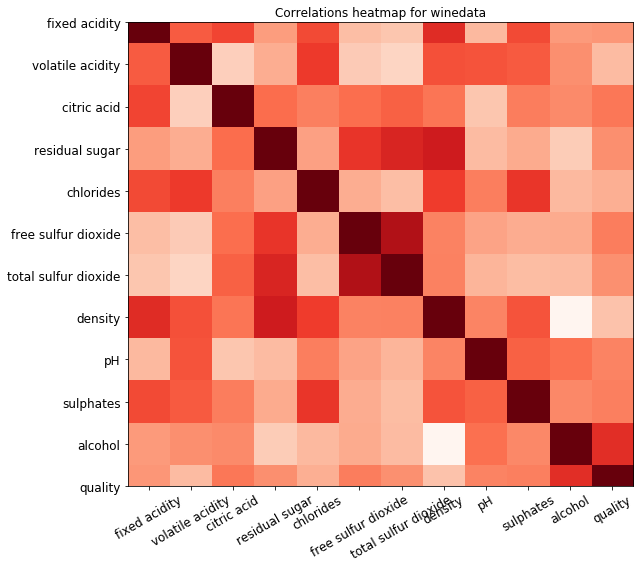

In [42]:
# before apply PCA, should check the correlation between each other feature

import numpy as np
plt.figure(figsize=(9, 9))
plt.imshow(df.corr(), cmap='Reds', interpolation= 'nearest')
plt.xticks(np.arange(len(df.corr().index.values)), df.corr().index.values, fontsize=12,rotation=30)
plt.yticks(np.arange(len(df.corr().index.values)), df.corr().index.values, fontsize=12)
plt.title('Correlations heatmap for winedata')
plt.tight_layout()
plt.show()

# the darker the color, the higher correlation 
# from the plot to see, except density & citric acid, density & fixed acidity, total sulfur dioxide &citric acid, these three 
# pairs has higher correlation, other features are not much related to each other. 

In [ ]:
# Question???should I do something about those paris of variable before apply PCA? or leave them there like that

In [43]:
from sklearn.decomposition import PCA

In [46]:
pca = PCA(n_components=3)

pca_components = pca.fit_transform(df)
print(pca.explained_variance_ratio_) # Since the result here should first two components explained most variance,
# so I will only use first two components

[0.95355286 0.04062238 0.00482557]


In [47]:
y=ground_truth

In [48]:
# plot the data using two new components
plt.figure(figsize=(10,5))
colours = ["r","b"]
for i in range(pca_components.shape[0]):
    plt.text(pca_components[i, 0], pca_components[i, 1], str(y[i]),
             color=colours[int(y[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

ValueError: Image size of 272322x62393 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 720x360 with 1 Axes>

In [49]:
import umap

In [50]:
umap_results = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(df)



In [ ]:
# Question, from the clustering result to see, how's this clustering look?

In [54]:
umap_results

array([[ 2.9040017 ,  4.719838  ],
       [-1.391592  , -0.4729498 ],
       [-1.1697617 ,  0.6072205 ],
       ...,
       [10.50634   , -0.28137234],
       [-1.208705  ,  8.170888  ],
       [ 2.3920085 , 10.435681  ]], dtype=float32)

In [62]:
# apply GMM clustering
from sklearn.preprocessing import StandardScaler
X = df
# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [64]:
from sklearn.mixture import GaussianMixture
gmm_cluster = GaussianMixture(n_components=3, random_state=120)

# Fit model
clusters = gmm_cluster.fit_predict(X_std)

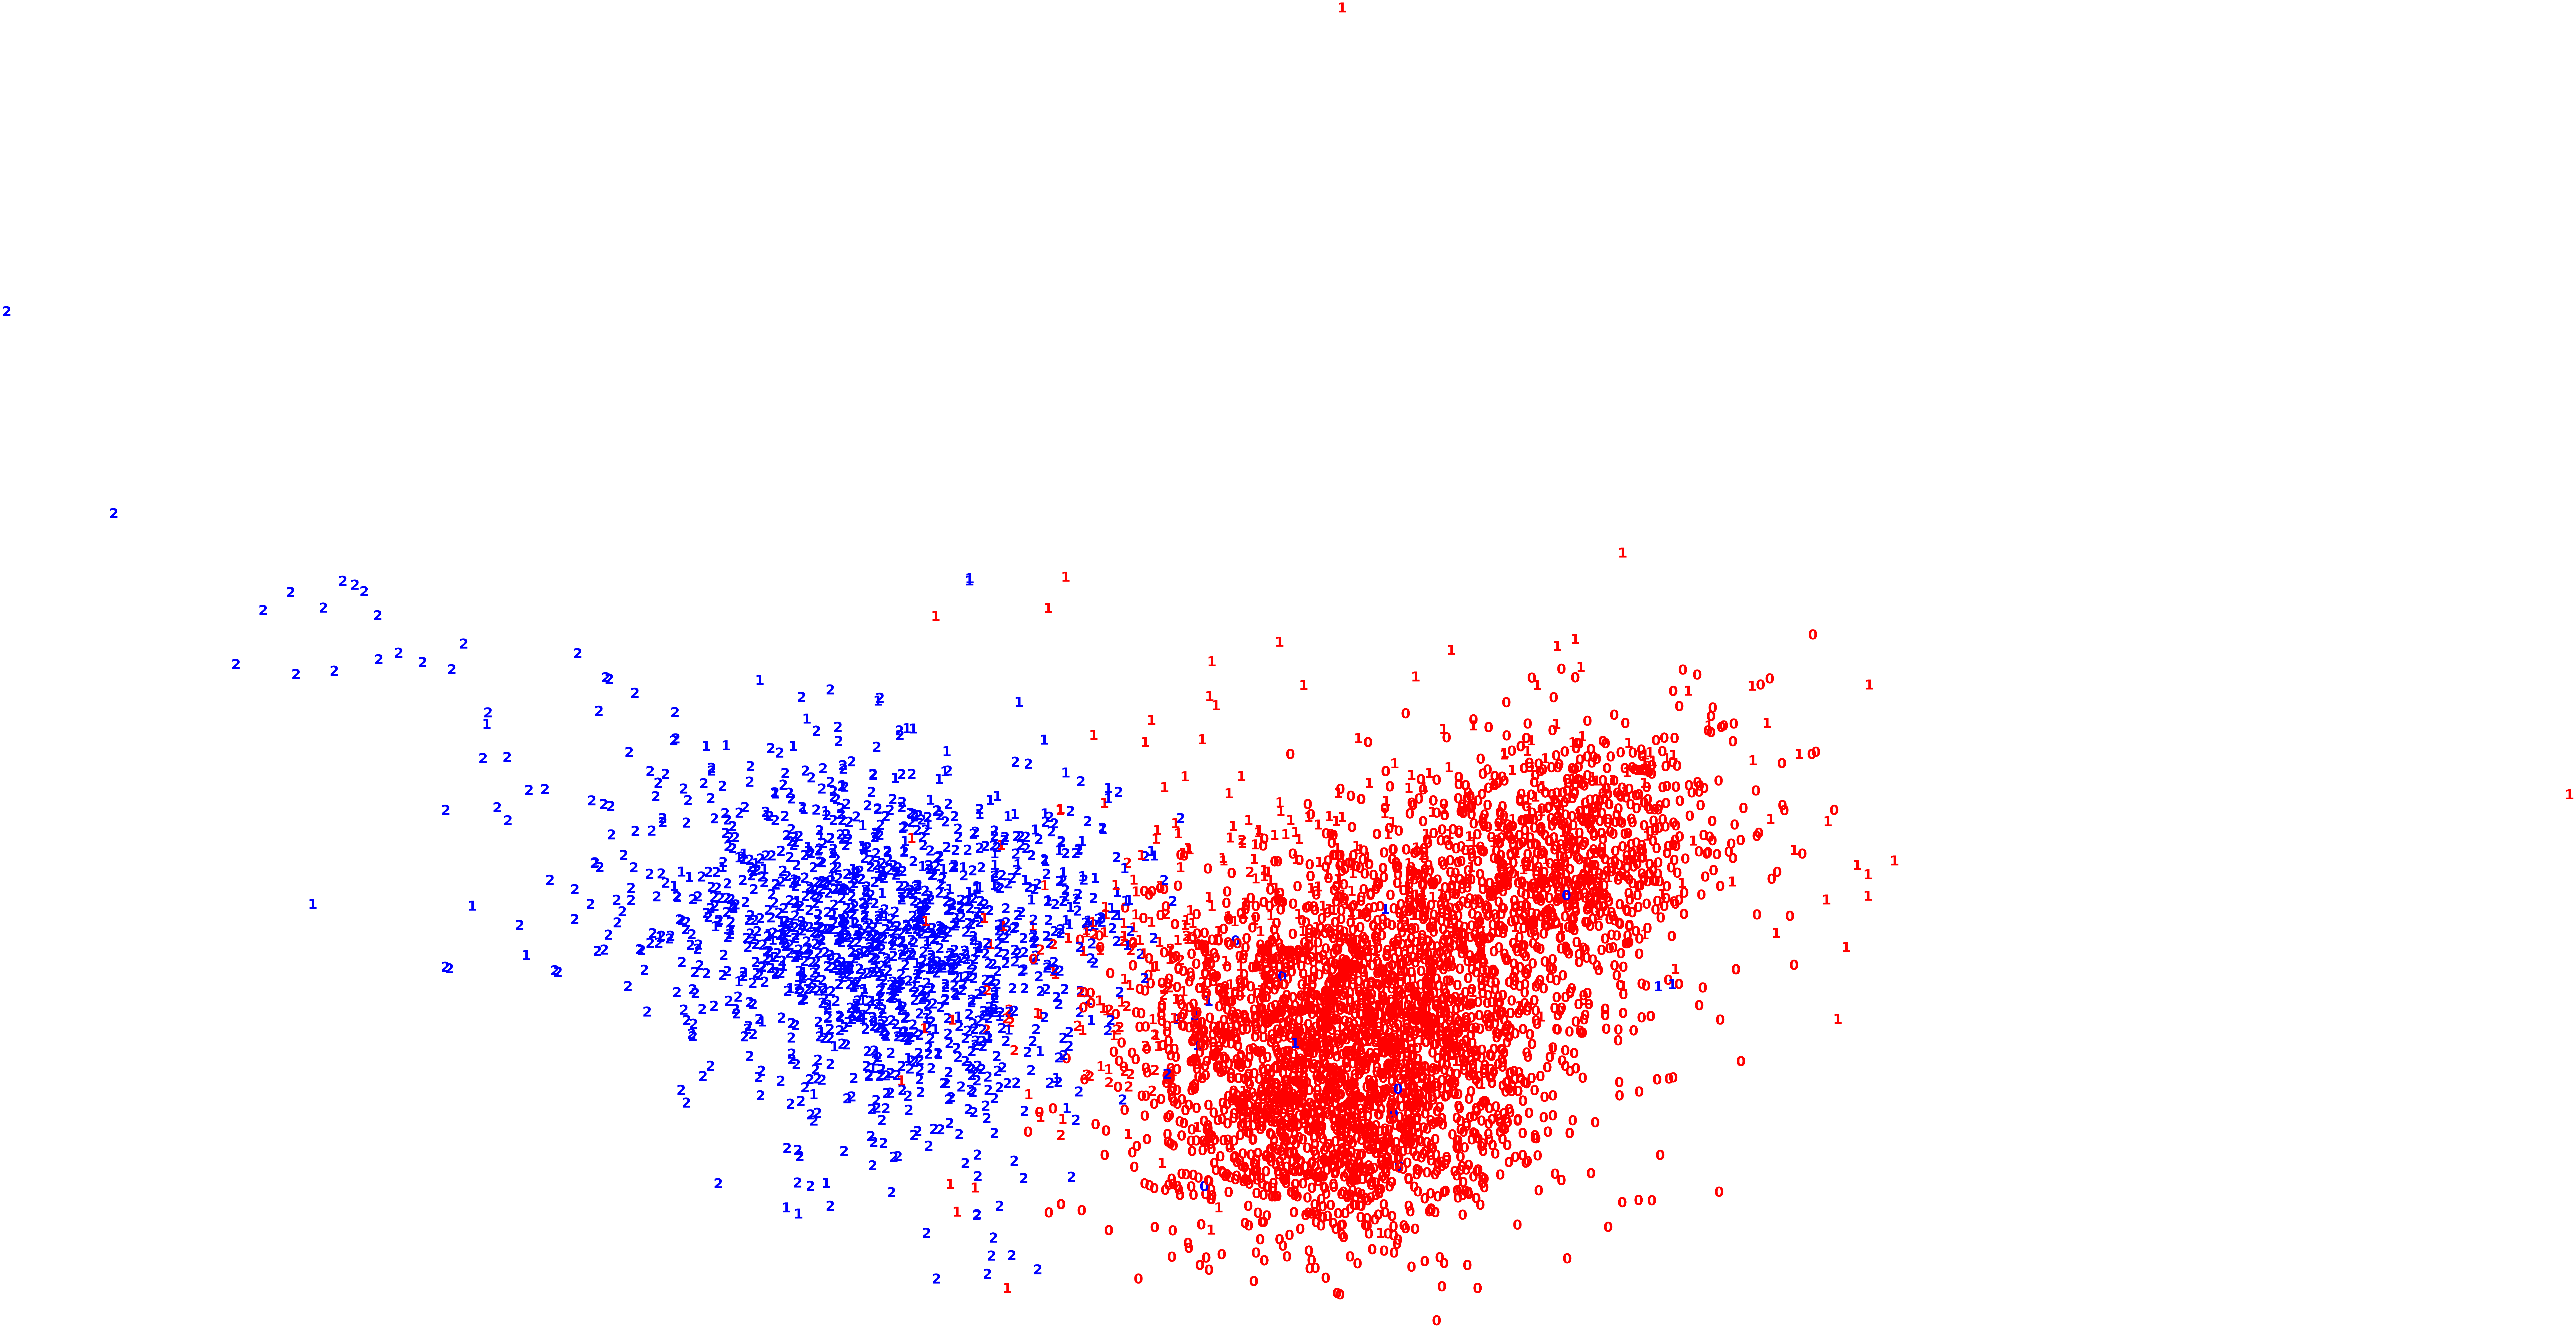

In [65]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.show() # this result showing separating two clusters very well, good model for identify wines

In [66]:
print(metrics.adjusted_rand_score(y, clusters))
print(metrics.silhouette_score(X_std, clusters, metric='euclidean'))

0.7396406367448406
0.19706979107850525
